In [1]:
!pip install ultralytics

from IPython import display

import ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 744.7/744.7 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [2]:
from ultralytics import YOLO

from IPython.display import display, Image

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="EixuzxbybAFPCmGCDgja")
project = rf.workspace("annotate-9u88r").project("underwater-2jdvm")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.40, to fix: `pip install ultralytics==8.0.196`


In [3]:
!yolo task=segment mode=train model=yolov8n-seg.pt data={dataset.location}/data.yaml epochs=30 imgsz=640

100% 6.73M/6.73M [00:00<00:00, 90.5MB/s]
Ultralytics YOLOv8.1.40 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/Underwater-1/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_

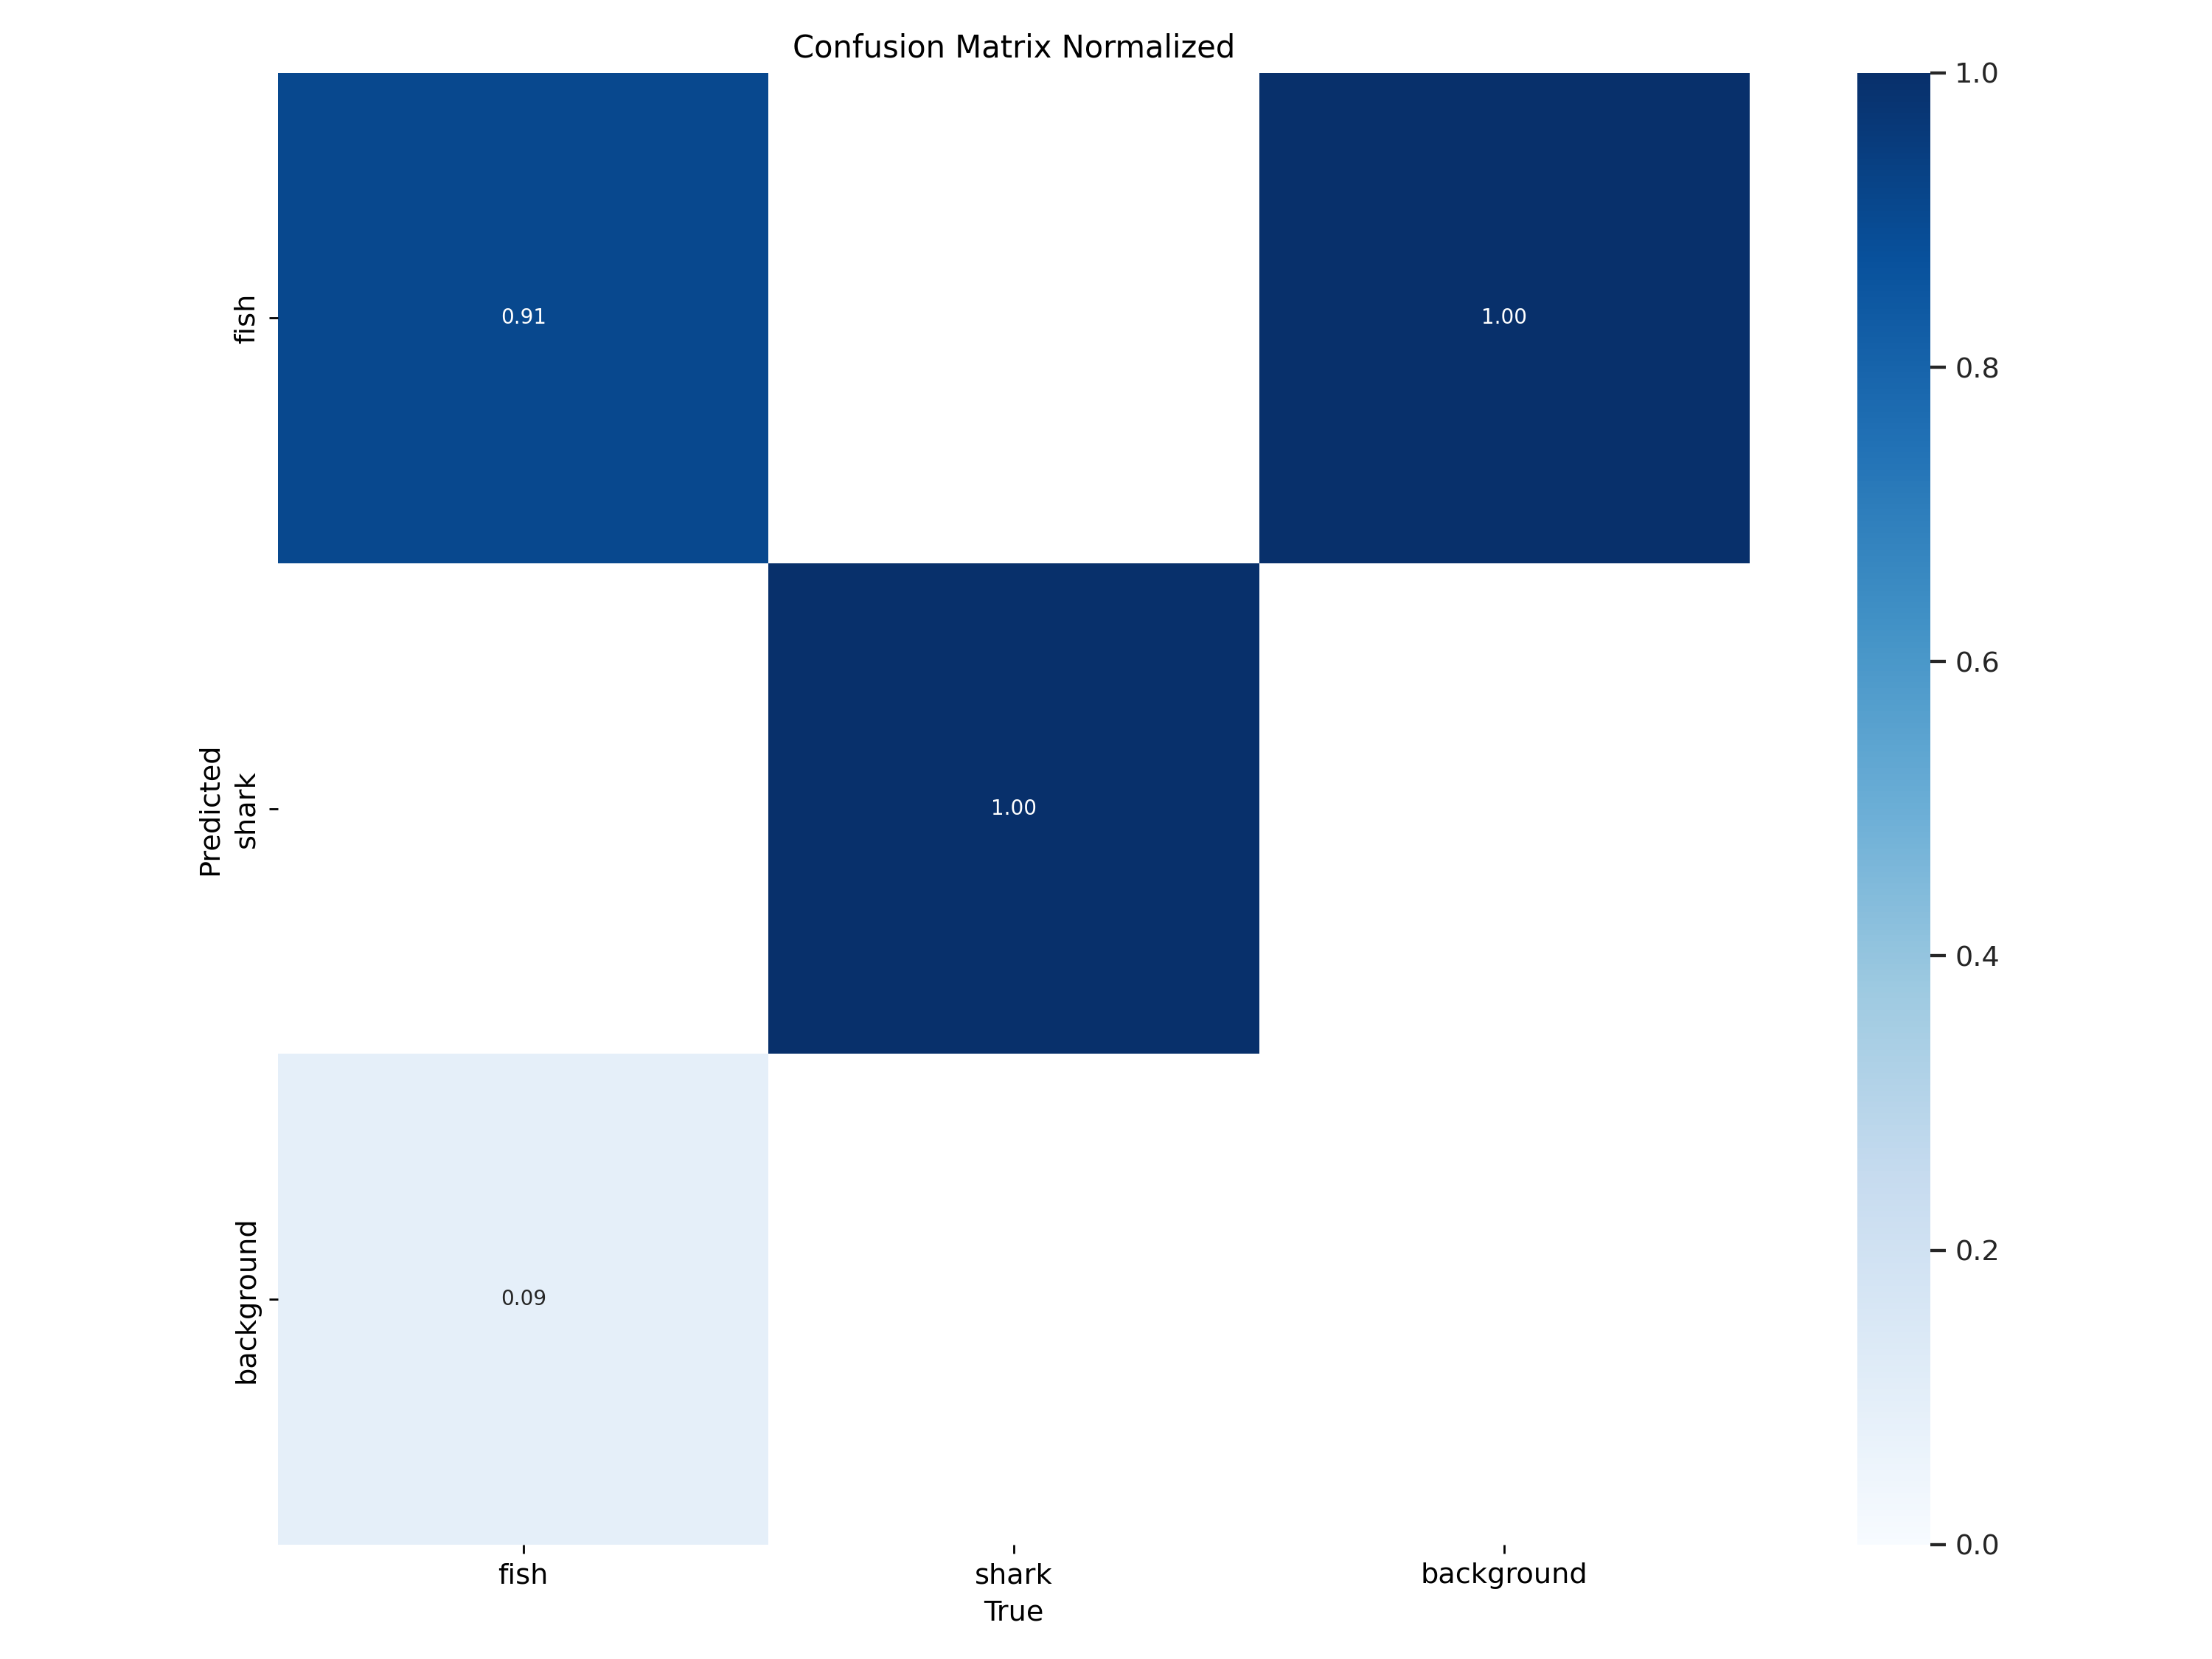

In [4]:
Image(filename=f'/content/runs/segment/train/confusion_matrix_normalized.png', width=600)

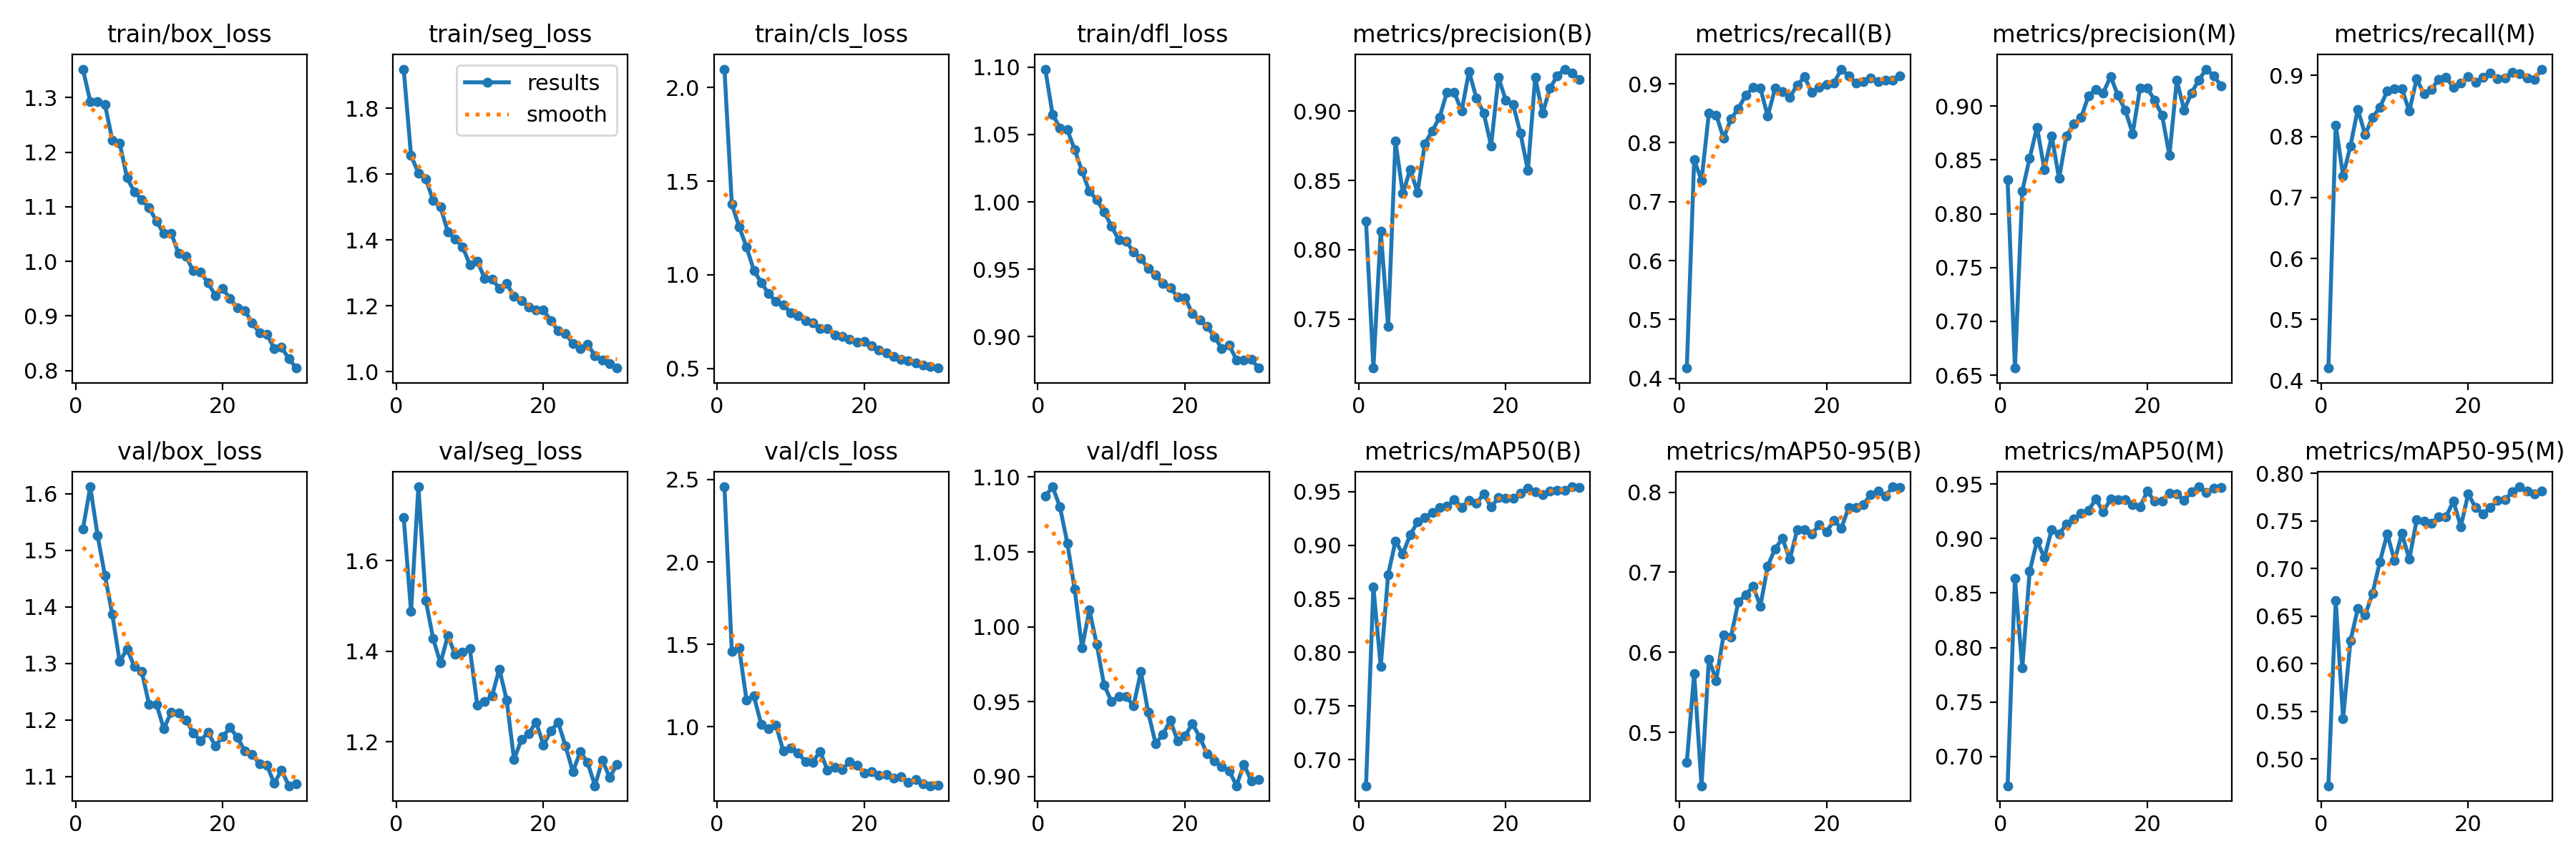

In [5]:
Image(filename=f'/content/runs/segment/train/results.png', width=600)

In [7]:
!yolo task=segment mode=val model='/content/runs/segment/train/weights/best.pt' data='/content/Underwater-1/data.yaml'

Ultralytics YOLOv8.1.40 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258454 parameters, 0 gradients, 12.0 GFLOPs
val: Scanning /content/Underwater-1/valid/labels.cache... 101 images, 0 backgrounds, 0 corrupt: 100% 101/101 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 7/7 [00:07<00:00,  1.13s/it]
                   all        101        539      0.922      0.915      0.953      0.807      0.917       0.91      0.945      0.773
                  fish        101        527      0.877      0.829      0.912      0.635      0.867       0.82      0.894      0.562
                 shark        101         12      0.967          1      0.995      0.979      0.967          1      0.995      0.985
Speed: 7.5ms preprocess, 10.2ms inference, 0.0ms loss, 11.8ms postprocess per image
Results saved to runs/segment/val
💡 Learn more at 

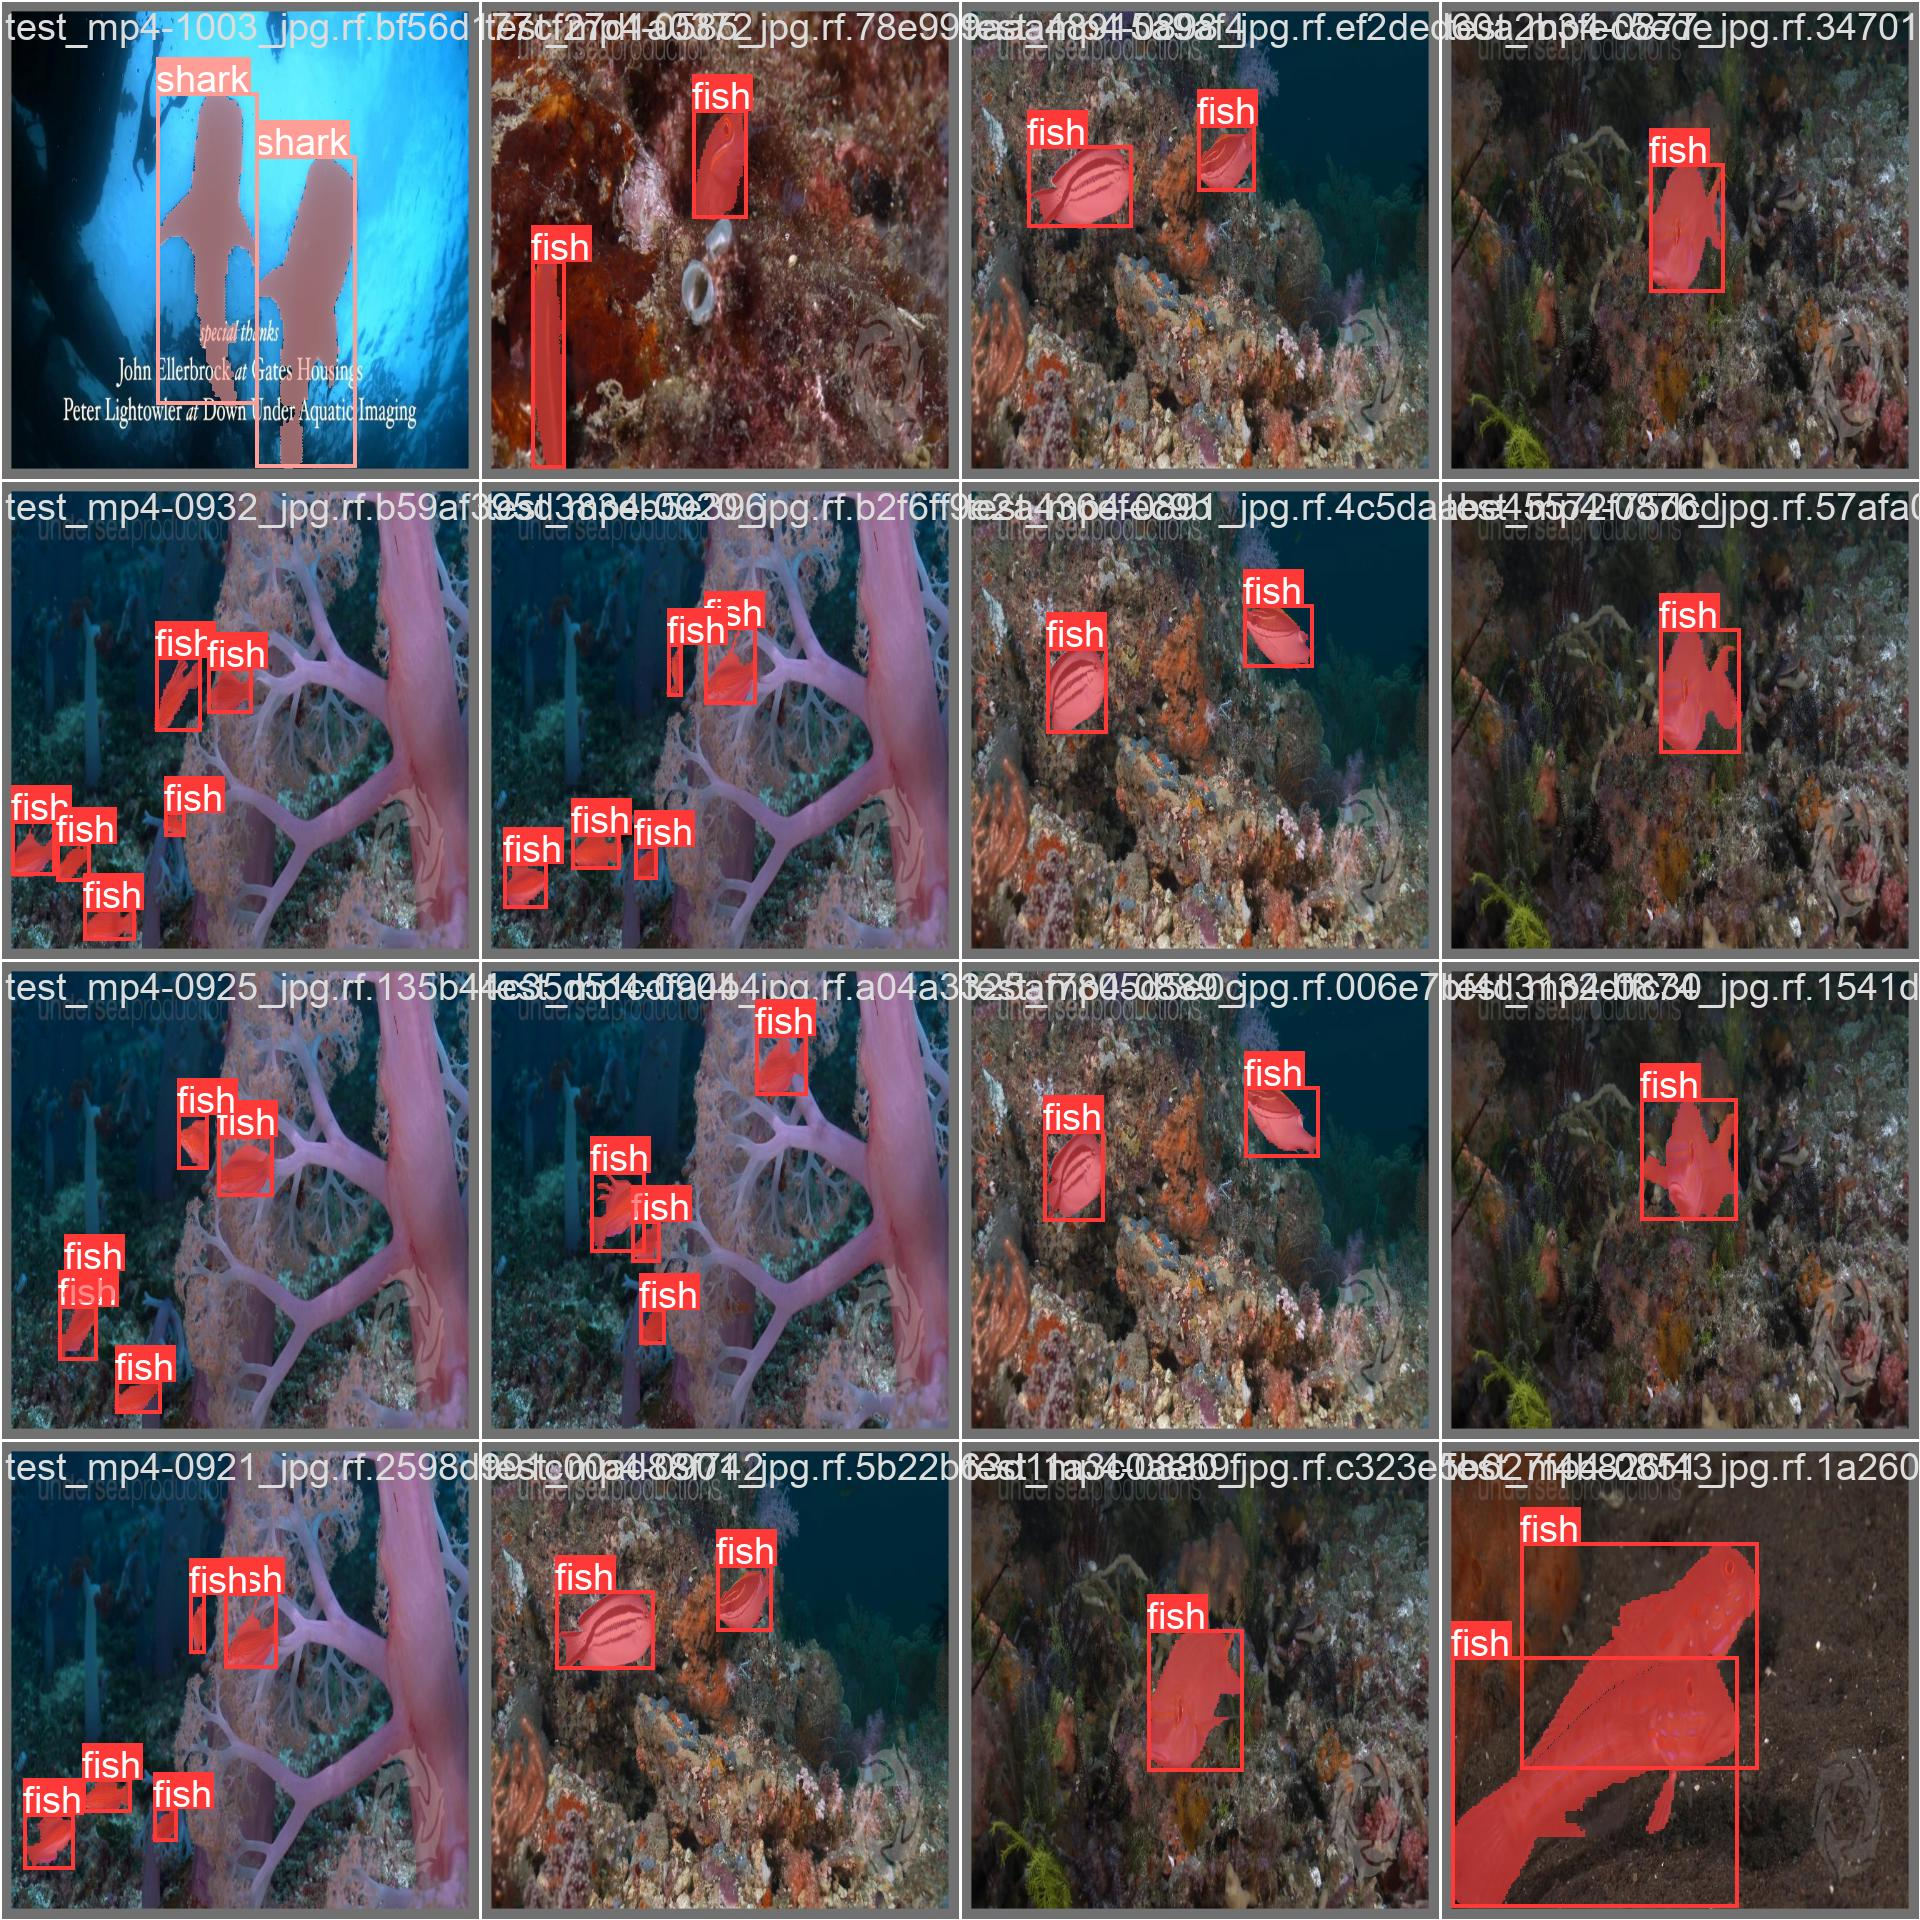

In [8]:
Image(filename = '/content/runs/segment/train/val_batch1_labels.jpg' , width = 600)